<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**

##CS6462 - PROBABILISTIC AND EXPLAINABLE AI 
##SEM2 2021/2

###CS6462_Lab_4.3

###Instructor: Enrique Naredo

Copyright (C) 2022 - All rights reserved, do not copy or distribute without permission of the author.

##Bayesian Linear Regression

In statistics, [linear regression](https://en.wikipedia.org/wiki/Linear_regression) is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables).

[Bayesian linear regression](https://en.wikipedia.org/wiki/Bayesian_linear_regression) is an approach to linear regression in which the statistical analysis is undertaken within the context of Bayesian inference, given the following assumptions:
* The regression model has errors that have a normal distribution, 
* a particular form of prior distribution is assumed,
* explicit results are available for the posterior probability distributions of the model's parameters.



###Example-3

In [ ]:
# import basic modules
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt


In [ ]:
# seed
np.random.seed(1001)

# parameters
M = 100
𝛼_real = 2.5
β_real = 0.9

# true
x = np.random.normal(10, 1, M)
y_real = 𝛼_real + β_real * x

# observed
noise = np.random.normal(0, 0.5, size=M)
y_obs = y_real + noise

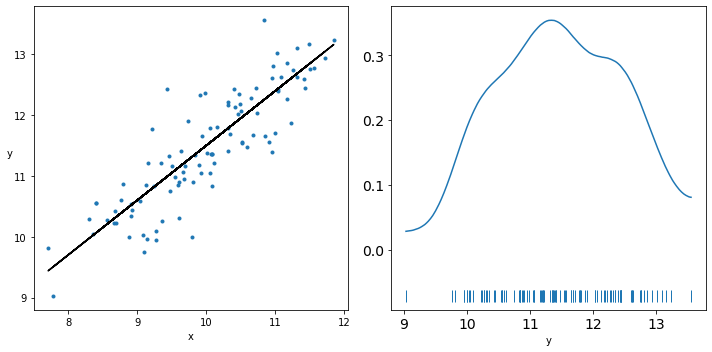

In [ ]:
import arviz as az

# figure
_, ax = plt.subplots(1, 2, figsize=(10, 5))

# 1st plot
ax[0].plot(x, y_obs, 'C0.')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y', rotation=0)
ax[0].plot(x, y_real, 'k')

# 2nd plot
az.plot_kde(y_obs, rug=True, ax=ax[1])
ax[1].set_xlabel('y')
plt.tight_layout();

#plt.savefig('my_fig.png', dpi=300)

[**PyMC3**](https://docs.pymc.io/en/v3/) 

Now is time to introduce you a powerful tool to perform probabilistic programming in Python.

PyMC3 allows users to fit Bayesian models using a variety of numerical methods, most notably Markov chain Monte Carlo (MCMC) and variational inference (VI). 

* Its flexibility and extensibility make it applicable to a large suite of problems.
* Along with core model specification and fitting functionality,
* PyMC3 includes functionality for summarizing output and for model diagnostics.

In [ ]:
import pymc3 as pm

# start with lower values and then try higher
num_samples = 200 # 2000
num_chains = 2 # 4

with pm.Model() as my_model:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=1)
    𝜎 = pm.HalfCauchy('𝜎', 5)
    μ = pm.Deterministic('μ', α + β * x)
    y_pred = pm.Normal('y_pred', mu=μ, sd=𝜎, observed=y_obs)
    idata = pm.sample(num_samples, tune=num_samples, chains=num_chains, return_inferencedata=True)

Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [𝜎, β, α]


Sampling 2 chains for 200 tune and 200 draw iterations (400 + 400 draws total) took 12 seconds.
The acceptance probability does not match the target. It is 0.9287608410999693, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9227447574202668, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 120590 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 120590 missing from current font.
  font.set_text(s, 0, flags=flags)


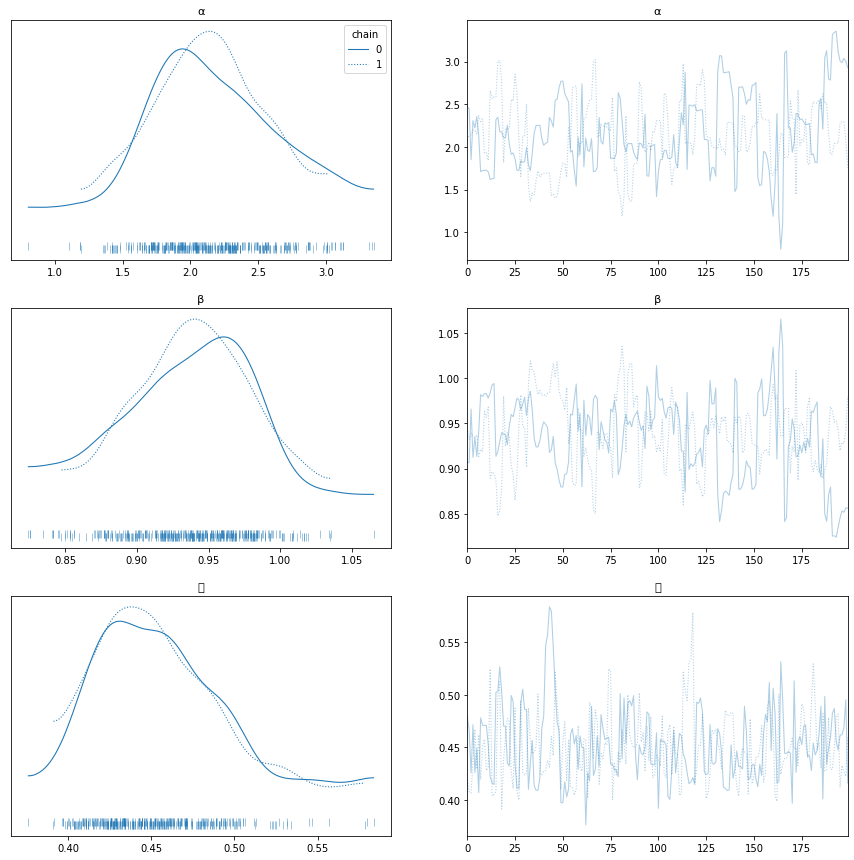

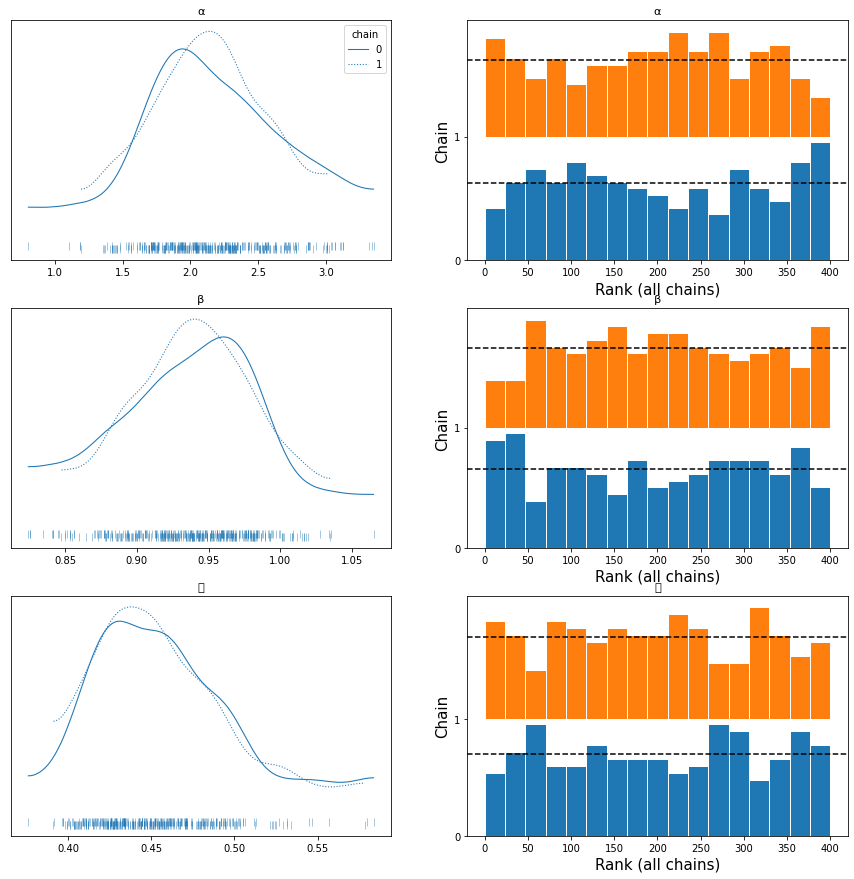

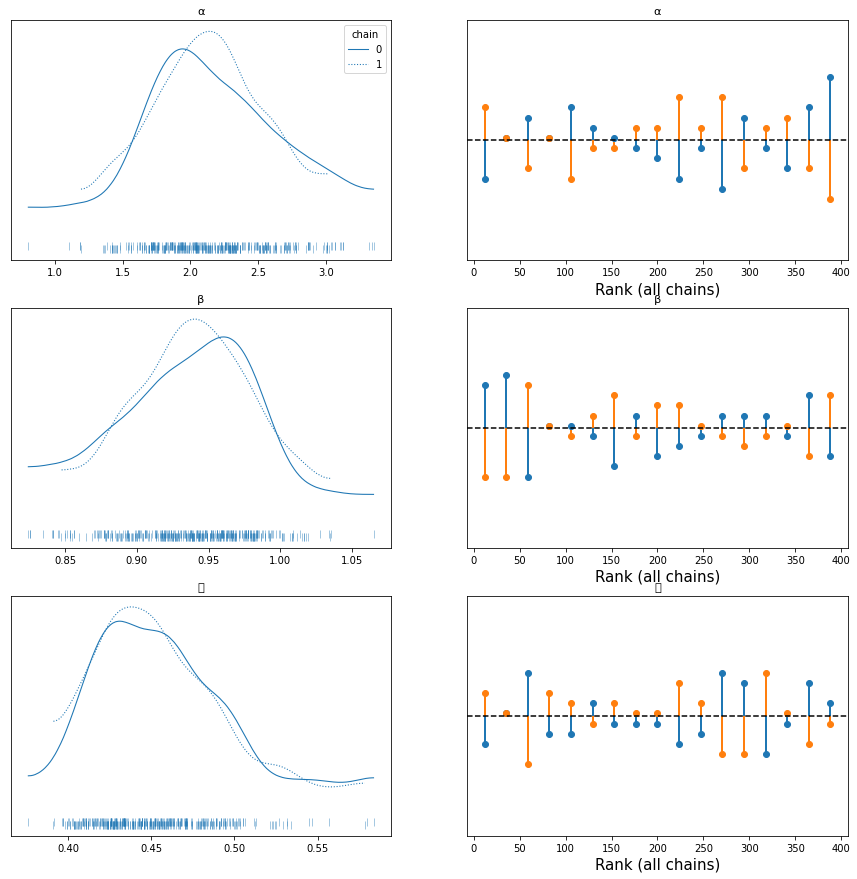

In [ ]:
# plot different traces 
for i, kind in enumerate(("trace", "rank_bars", "rank_vlines")):
    az.plot_trace(idata_g, var_names=['α', 'β', '𝜎'], kind=kind, 
                  rug=True, rug_kwargs={"alpha": .4}, figsize=(15, 15), legend=True);

###Exercise-6
Play with differrent values of the Bayesian model
* $\alpha$, $\beta$, and $\rho$,
* use different number of samples and chains,
* give a report of your findings.

In [ ]:
# here your code






###Exercise-7

* Use the information from the Exercise 4 using now Bayesian linear regression.

In [ ]:
# here your code






###Exercise-8
Use the Exercise-7 to play with differrent values of the Bayesian model
* $\alpha$, $\beta$, and $\rho$,
* use different number of samples and chains,
* give a report of your findings.

In [ ]:
 # here your code




